## Step 1 - Import and getting the data

In [1]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
mnist.validation.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
mnist.train.num_examples

55000

In [11]:
mnist.validation.num_examples

5000

## Step 2 - Visualizing the data

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [14]:
mnist.train.images.shape

(55000, 784)

In [15]:
mnist.train.images[500]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
my_img = mnist.train.images[500].reshape(28,28)

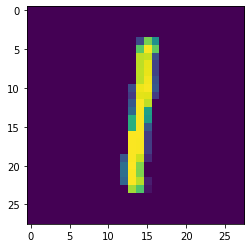

In [18]:
plt.imshow(my_img)

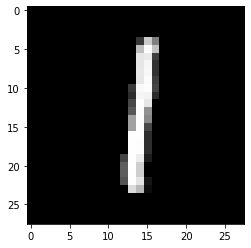

In [19]:
plt.imshow(my_img, cmap='gist_gray')

In [20]:
my_img.min()

0.0

In [21]:
my_img.max()

1.0

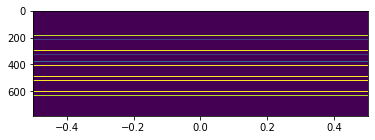

In [26]:
my_img2 = mnist.train.images[500].reshape(784,1)
plt.imshow(my_img2, aspect=0.0004)

## Step 3 - Building my first NN Model

1. Placeholders
2. Variables
3. Create our computation graph 
4. Loss functions
5. Optimizer
6. Create and run the session

In [27]:
x = tf.placeholder(tf.float32, shape = [None, 784])

In [28]:
# Weights and bias
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [29]:
# create my computation graph
y = tf.matmul(x, W) + b

In [30]:
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [31]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,
                                                                         logits = y))

In [55]:
optimizer = tf.train.AdamOptimizer()

In [56]:
train = optimizer.minimize(cross_entropy)

In [57]:
init = tf.global_variables_initializer()

In [ ]:
# Create and run the session

with tf.Session() as sess:
    sess.run(init)
    
    # Train 100000
    for step in range(100000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict = {x:batch_x, y_true:batch_y})
        
        #Evaluate the test / train model
    
    matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    
    accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
    
    print(sess.run(accuracy, feed_dict = {x:mnist.test.images,
                                         y_true:mnist.test.labels}))
    
# print("Epoch: {} cost={: .4f}".format(epoch+1, avg_cost))

# print("Model has completed {} Epochs of training".format(training_epochs))